# Project 2 : Visualization

## Instructions

### Description

In this project, you will look at three bad visualizations then:

1. Identify what makes them bad
1. Use the same data to make a better chart
1. Explain an interesting pattern you noticed.

Some helpful questions to determine if a visualization is bad:

1. What is the visualization trying to show? Ex. Comparison? Relationship? Change over time?
2. Is this the right visualization to use?
3. Does the visualization have the correct labels and axes limits?
4. Is there too much being shown in one visualization? Should it be split?

Some helpful questions to find patterns in a visualization:

1. How do different data points compare? Are there significant differences? Are there any outliers?
2. If comparing data/series, how do they rank? Is there a significant difference between rankings?
3. If looking at data over time, is there any seasonality? How do the values compare to the mean and/or median? How do the values change over time? Ex. Ups and downs? Always up? Always down?

### Getting Started

The lecture on data visualization (available in the usual places) has a lot of code examples.  Also don't forget the matplotlib documentation available from the Help menu in the notebook.

Also, this is the first assignment we've given where we ask you to provide text answers and not just code. You don't have to get fancy, but you'll want to use Markdown to write up your answers.  There is Markdown help available from the Help menu as well.

### Grading

For grading purposes, we will clear all outputs from all your cells and then run them all from the top.  Please test your notebook in the same fashion before turning it in.

### Submitting Your Solution

To submit your notebook, first clear all the cells (this won't matter too much this time, but for larger data sets in the future, it will make the file smaller).  Then use the File->Download As->Notebook to obtain the notebook file.  Finally, submit the notebook file on Canvas.

### Credits

Many thanks to Saad Elbeleidy for this assignment!

### Setup Code

In [1]:
## Imports
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Problem 1: Bad line chart (15 points)

To get you started, we'll walk through 1 bad visualization.

![Bad Line Chart](http://imgur.com/kB6uNZC.png)

In [26]:
# Bad line chart data & names
badLineNames = ["2016 Q1", "2016 Q2", "2016 Q3", "2016 Q4"]
badLineProduct1 = [240, 300, 280, 400]
badLineProduct2 = [300, 320, 150, 160]
badLineProduct3 = [120, 140, 180, 160]
badLineProduct4 = [380, 400, 450, 500]

**What makes this visualization bad?**

**1. What is the visualization trying to show? Ex. Comparison? Relationship? Change over time?**

This visualization trys to show data over time.

**2. Is this the right visualization to use?**

Yes, we should be using a line chart to show data over time.

**3. Does the visualization have the correct labels and axes limits?**

There are no labels or a title. We could also use some more space between the min and maximum data points and the axes limits.

**4. Is there too much being shown in one visualization? Should it be split?**

Yes, it's quite difficult to follow each series, it should be split.


Since the chart type is the correct one, it seems all we need to do is add labels and split the lines into panels. Before we do that, we can probably also improve the design. We covered how to improve a `matplotlib` plot in class using different styles. Select a `style` and apply it below.

In [27]:
## Apply your chosen style here
plt.style.use('tableau-colorblind10') #Sorry, I'm colorblind so I can't see very well


example of how to set up subplots can be found in lecture 05, slide 13. 

Now we need to plot the data over different panels. We can use [`plt.subplots`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots) to create multiple panels. Since we have 4 products, we're going to need 4 panels on top of each other. `subplots` returns two variables, the figure object and an array of axes. What we can do is loop through each Axes object and create a plot for that product. The first Axes object should plot the first product, the second should plot the second product and so on.
<br><br>
**Step 1: Buffers** 
<br>Each subplot will have its own y axis, but to make the scale is the same for all subplots, create a buffer between the lowest value among all products and the start of the y axis as well as between the highest value and the top of the y axis. These buffers are simply integers that extend the y axis above the highest value in the products, and below the lowest.
<br><br>
**Step 2: Mean**
<br>Calculate the mean of the entire data set -- the mean of the individual product means. To calculate this easily, first put the products in a list, create a list of the individual means using a comprehension over the product list, then find the mean of the list of individual means.
<br><br>
**Step 3: Colors**
<br>Choose a color for the plot of each product. This can be done by filling a list with each color's matplotlib name. Available colors can be found [here](https://matplotlib.org/2.0.2/api/colors_api.html)
<br><br>
**Step 4: Subplots** 
<br>Now that those numbers are calculated, create 4 line charts on top of each other, each plotting one of the products.
<br>For each subplot:
<br>
1) plot the product with `plot(data, color)`
<br>
2) Set the y scale using `set_ylim(bottomBuffer, topBuffer)`
<br>
3) Add an x label if this panel is not the bottom one using `set_xticklabels(list of labels)`
<br>
4) Add a title to the subplot with the product number using `set_title(title)`
<br>
5) Add a dashed line with the value of the mean using `plot(mean, args)` or `axhline(mean, args)`. More info [here](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axhline.html)
<br><br>
**Step 5: Beautify**
<br>
1) Add a title to the whole diagram(the superplot) with `fig.suptitle(title)`
<br>
2) Rearrange subplots, if necessary, with `fig.subplots_adjust(left, bottom, right, top, wspace, hspace)`
<br><br>
**Notes:**
<br>
- Many of the arguments to many of these functions are 'default', meaning they're optional. If there's an argument you don't need or want, try leaving it out. For example, if you only want to change the hspace of the subplots, you can call `fig.subplot_adjust(hspace=0.6)` without specifying the other arguments. Just be sure to label the argument you want to specify. Don't just write `fig.subplot_adjust(0.6)`

[305.0, 232.5, 150.0, 432.5]


/tmp/ipykernel_570427/3599584842.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""] + quarters, fontsize=6)


Text(0.04, 0.5, 'Sales (Thousands of USD)')

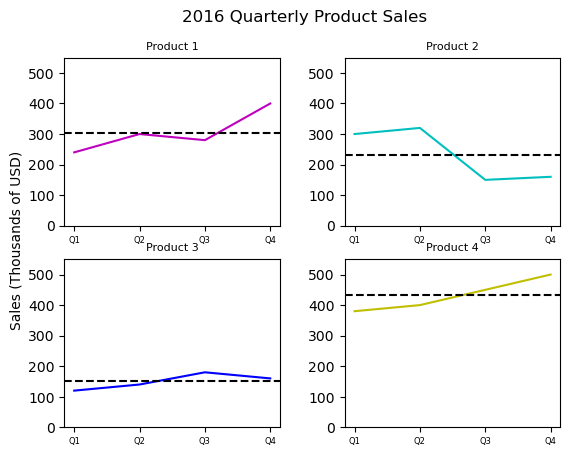

In [33]:

# Step 1
buffer = 50
xvals = badLineNames
yvals = [badLineProduct1,badLineProduct2,badLineProduct3,badLineProduct4]
y_max = max(max(yvals[0]),max(yvals[1]),max(yvals[2]),max(yvals[3]))
y_min = min(min(yvals[0]),min(yvals[1]),min(yvals[2]),min(yvals[3]))
# Step 2
individual_means = [sum(yval)/len(yval) for yval in yvals]
overall_mean = sum(individual_means)/len(individual_means)
print(individual_means)
# Step 3
colors = ['m', 'c', 'b', 'y']
# Step 4
fig, axes = plt.subplots(nrows=2,ncols=2)
axs = axes.ravel()

for i, yval in enumerate(yvals):
    ax = axs[i]
    ax.plot(yval, color=colors[i])
    ax.set_ylim(0, y_max+buffer)
    
    quarters = [label.split()[-1] for label in badLineNames]
    ax.set_xticklabels([""] + quarters, fontsize=6)
    
    
    ax.set_title("Product {}".format(i+1), fontsize=8)
    
    ax.axhline(y=individual_means[i], color='black', linestyle='--', label='Mean')
    
# Step 5
fig.suptitle("2016 Quarterly Product Sales")
fig.subplots_adjust(wspace=.30)
fig.text(0.04, 0.5, 'Sales (Thousands of USD)', va='center', rotation='vertical', fontsize=10)



Now that you've created a better plot, try to describe a pattern in the dataset. Use the following questions as a reference:

1. How do different data points compare? Are there significant differences? Are there any outliers?
2. If comparing data/series, how do they rank? Is there a significant difference between rankings?
3. If looking at data over time, is there any seasonality? How do the values compare to the mean and/or median? How do the values change over time? Ex. Ups and downs? Always up? Always down?

**Your Answer Here:**

**1. Product 4 is the highest performing product with a mean quarterly sales of 432.5, which significantly outperforms all other products, especially in Q4 where it reached sales of 500. Product 3, on the other hand, significantly underperforms other products with a low average of 150 and a low outlier of 120.**

**2. The rankings for products are as follows:**

   **a. Product 4: Mean of 432.5**
   
   **b. Product 1: Mean of 305.0**
   
   **c. Product 2: Mean of 232.5** 
   
   **d. Product 3: Mean of 150.0**

   **Product 1 and 2 have more moderate mean sales values, but product 3 and 4 seem to have significant differences on the lower end and higher end, respectively.**

**3. Product 1 and 4 have upward trending sales values throughout the year. Both data series have consistently increasing sales as time passes through the year, both peaking in Q4 and exceeding their respective averages. Product 2 is the opposite, where the sales are decreasing in Q3 and Q4 are less than it's respective mean. Product 3 seems to have relatively stable sales throughout the year.**
>*Edit this cell with your answer*

Next, look through the following bad visualizations and apply the above workflow to:

1. Determine what makes them bad
1. Create a better visualization
1. Describe a pattern in the data

### Problem 2: Bad pie chart (20 points)

Explain why this visualization is a bad one:

![Bad Pie Chart](http://imgur.com/Wg9DOZd.png)

**Your Answer Here:**
What makes this visualization bad?

1. What is the visualization trying to show? Ex. Comparison? Relationship? Change over time?

**This visualization is comparing data varying by geographical locations that makes up part of a whole.**

2. Is this the right visualization to use?

**Yes, a pie chart should be used to show how each piece of data comprises the whole.**

3. Does the visualization have the correct labels and axes limits?

**There are labels, but it is difficult to see exactly what it is representing since there is no percentage or number to indicate its value. Also, there is no title, so the reader has no idea of what the pie chart actually means. Axes are uneccessary for a pie chart. Also, a smaller issue is that the pie is not completely circular.**

4. Is there too much being shown in one visualization? Should it be split?

**Using subplots for this pie chart would be inappropriate.**


>*Edit this cell with your answer*

In [27]:
college_towns = ["Golden", "Boulder", "Fort Collins", "Colo Springs"]
student_distributions = [0.37, 0.4, 0.5, 0.35]

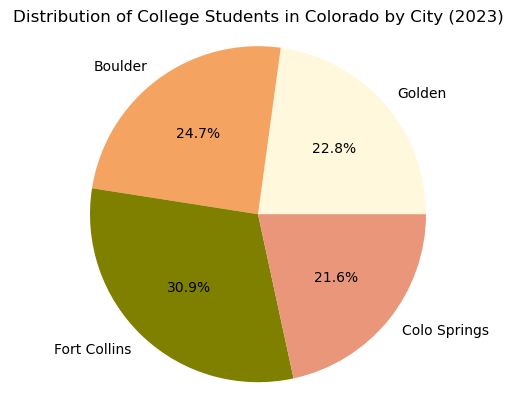

In [40]:
import matplotlib.pyplot as plt

plt.style.use('tableau-colorblind10')
colors = ['cornsilk','sandybrown','olive','darksalmon'] 

plt.pie(student_distributions, labels=college_towns, autopct='%1.1f%%',colors=colors)

plt.axis('equal')
plt.title('Distribution of College Students in Colorado by City (2023)')
plt.show()


Tell a story or describe a pattern using your new visualization.

**Your Answer Here:**

**1. There is not much difference within the dataset between data points, with the exception of Fort Collins. Fort Collins comprises almost 1/3 of the cohesive university student population in Colorado at 30.9% (Go Rams!!!)**

**2. The rankings are as follows: Fort Collins at 30.9%, Boulder at 24.7%, Golden at 22.8%, and Colorado Springs at 21.6%. There is no significant difference between rankings, besides Fort Collins. This indicates that a majority of students attend Colorado State University.**

**3. The data is static and does not change over time. It is subject to change in following years, but this is data for the specific year of 2023. The data also has no significant discrepancies from the mean and median of the data.**

>*Edit this cell with your answer*

### Problem 3: Bad bar chart 1 (20 points)

Explain why this visualization is a bad one:

![Bad Bar Chart](http://imgur.com/AkLyM9I.png)

**Your Answer Here:**

1. What is the visualization trying to show? Ex. Comparison? Relationship? Change over time?

**This visualization is comparing data of three different objects.**

2. Is this the right visualization to use?

**Yes, a bar graph should be used to compare data of 3 different elements.**

3. Does the visualization have the correct labels and axes limits?

**There are no axes labels or a title, so we do not know what the data represents. The y-axis limit should be changed. It makes the data look disproportionately different than they really are. Also the data for B isn't the same as the list would indicate?**

4. Is there too much being shown in one visualization? Should it be split?

**Using subplots for this pie chart would be inappropriate.**

Edit this cell with your answer
>*Edit this cell with your answer*

In [6]:
badBarNames = ["A", "B", "C"]
badBarValues = [240, 232, 251]

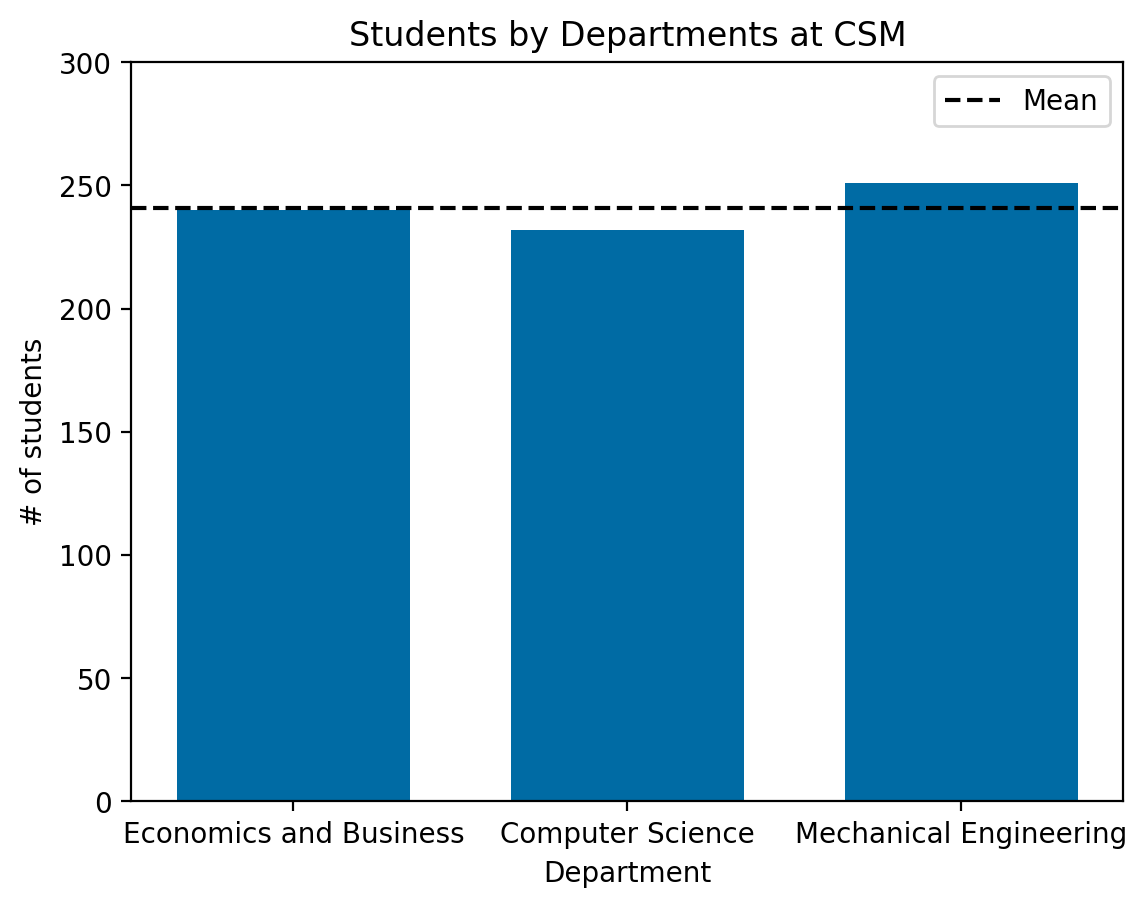

In [90]:
# Plot a better chart using this data
students = [240, 232, 251]
departments = ['Economics and Business', 'Computer Science', 'Mechanical Engineering']
mean = sum(students)/len(students)

plt.bar(departments, students, width=.7)
plt.axhline(y=mean, color='black', linestyle='--', label='Mean')
plt.ylim(0, 300)
plt.title('Students by Departments at CSM')
plt.xlabel('Department')
plt.ylabel('# of students')
plt.legend()
plt.show()

Tell a story or describe a pattern using your new visualization.

**Your Answer Here:**

**1. There are no large discrepancies between any of the data. All departments are balanced and have a similar amount of enrolled students (though this is likely far from the truth in reality).**

**2. The rankings are as follows: Mechanical engineering at 251, Econ/Bus at 240, and CS at 232. There is no significant difference between the departments, as they all have nearly the same amount of students.**

**3. This dataset is static and does not change over time. None of the data strays too far from the mean or median values.**
>*Edit this cell with your answer*

### Problem 4: Bad bar chart 2 (20 points)

Explain why this visualization is a bad one:

![Bad Bar Chart](http://imgur.com/Ns3lgyp.png)

**Your Answer Here:**
1. What is the visualization trying to show? Ex. Comparison? Relationship? Change over time?

**This visualization is tracking monthly data that changes over time.**

2. Is this the right visualization to use?

**No. Since the data is continuous, the most appropriate choice would be a line chart.**

3. Does the visualization have the correct labels and axes limits?

**The x-axis has clear labels, but there are no units for the y-axis. There is also no title. Also, the y-axis has incorrect boundaries, the graph is off-center, and the tick marks on top of and on the right of the graph are unnecessary.**

4. Is there too much being shown in one visualization? Should it be split?

**There is only one series of data, so using subplots is unnecessary.**

>*Edit this cell with your answer*

In [1]:
badBar2Names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
badBar2Values = [240, 320, 360, 280, 290, 300, 500, 410, 390, 200, 220, 240]

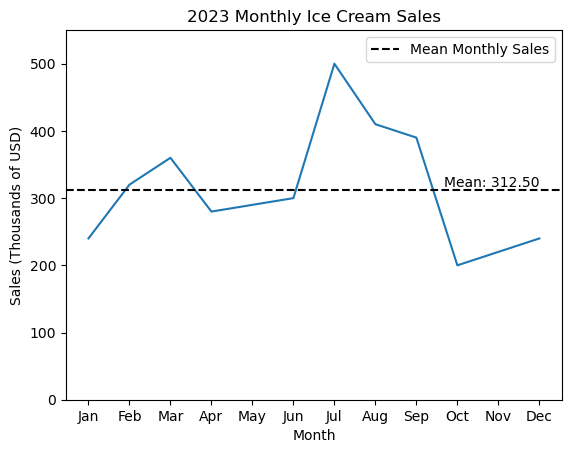

In [25]:
# Plot a better chart using this data
import matplotlib.pyplot as plt

mean = sum(badBar2Values) / len(badBar2Values)

plt.plot(badBar2Names,badBar2Values)
plt.title('2023 Monthly Ice Cream Sales')
plt.xlabel('Month')
plt.ylabel('Sales (Thousands of USD)')
plt.ylim(0, 550)
plt.axhline(mean, color='black', linestyle='--', label='Mean Monthly Sales')
plt.text(11, mean, f'Mean: {mean:.2f}', color='black', ha='right', va='bottom')
plt.legend()
plt.show()

Tell a story or describe a pattern using your new visualization.

**Your Answer Here:**

**1. The data seems to trend upwards during summer months as the weather gets warmer, and falls as the weather begins to decline. The outliers of the set are in August and October, which are the highest and lowest of the data set, respectively.**

**2. The values of warmer months (i.e. June-September) seem to outrank colder months (i.e October-February) quite significantly.**

**3. For this data, there is indisputably an element of seasonality. Summer months tend to rise above the mean monthly sales value, while the opposite holds true as well. This indicates a change in consumer preference based on season changes. The values follow a wavelike pattern with peaks and troughs as time moves forward.**

>*Edit this cell with your answer*

### Questionnaire
1) How long did you spend on this assignment?
<br><br> **About 3 hours, with the majority being spent on the first problem.**

2) What did you like about it? What did you not like about it?
<br><br> **I liked that I had the opportunity to practice with matplotlib, as it is certainly important to data analytics. However, I don't really like data visualization. I've always been better at more "back-end" stuff than the more creative side of programming.**

3) Did you find any errors or is there anything you would like changed?
<br><br> **One of the data points in problem 3 does not match up with its graph (badBarValues[1]). Also, the pie chart was a bit confusing. I wasn't exactly sure how to approach the data given to us.**